# How similar are husbands and wives?
The purpose of this study is to examine the physical relationship between husbands and wives with respect to their heights and ages.

In other words, is a husband's height indicative of his wife's height (or their ages)?

Linear regression model will be used to examine this relatioship.

In [125]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from statsmodels.tools.eval_measures import rmse

In [6]:
# Read
df = pd.read_csv("husbandsWives.csv")

# 1. Examine the heights relationship

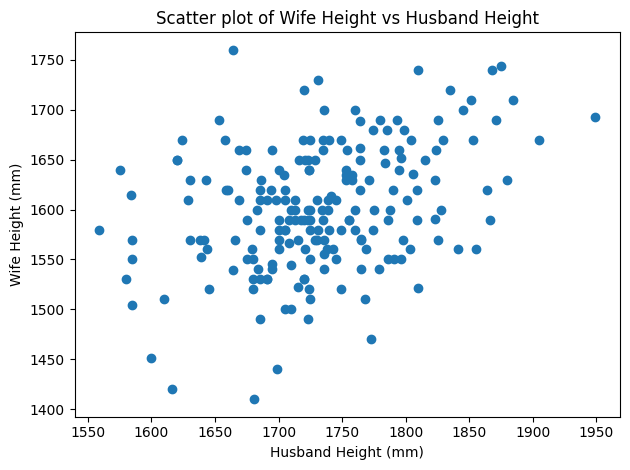

In [23]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(df.Ht_Husband,df.Ht_Wife)
ax.set_xlabel("Husband Height (mm)")
ax.set_ylabel("Wife Height (mm)")
ax.set_title("Scatter plot of Wife Height vs Husband Height",)
fig.tight_layout()
plt.show()

In [31]:
# Relationship
df[["Ht_Husband","Ht_Wife"]].corr(method="pearson")

,Ht_Husband,Ht_Wife
Ht_Husband,1.000000,0.364434
Ht_Wife,0.364434,1.000000


The scatter plot and correlation matrix shows a 36.44% positive association between husbands' heights and wives' heights. There is a mild, but clear, association between partners' height. The association is positive. The association is "somewhat" linear.

In [116]:
# Regression
model = smf.ols("Ht_Wife~Ht_Husband", data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Ht_Wife   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     30.17
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.21e-07
Time:                        21:27:42   Log-Likelihood:                -1090.4
No. Observations:                 199   AIC:                             2185.
Df Residuals:                     197   BIC:                             2191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1028.5718    104.469      9.846      0.0

The equation should be $\hat{y} = 0.3310x_i + 1028.5718$.

In [165]:
# Recreating regression model in inches (for good measure)
df["Ht_Wife_in"] = df["Ht_Wife"]/25.4
df["Ht_Husband_in"] = df["Ht_Husband"]/25.4

model2 = smf.ols("Ht_Wife_in~Ht_Husband_in", data=df)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:             Ht_Wife_in   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     30.17
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.21e-07
Time:                        21:52:50   Log-Likelihood:                -446.66
No. Observations:                 199   AIC:                             897.3
Df Residuals:                     197   BIC:                             903.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        40.4950      4.113      9.846

Changing of unit does not affects the slope of the linear regression model (i.e. the slope remains at 0.3310) but the intercept is now 404.9495 (i.e. 1028.5718/2.54).

# 2. Evaluation

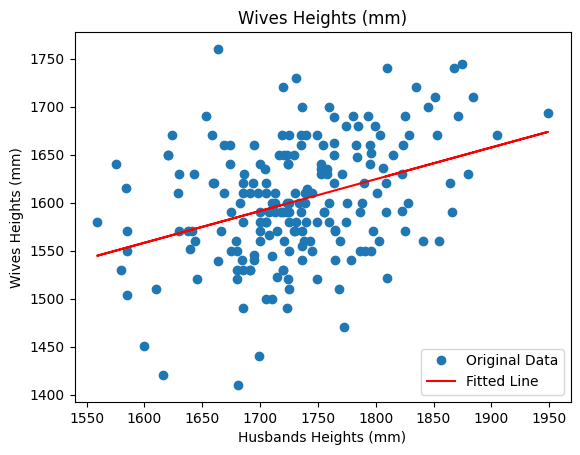

In [73]:
# Predict
intercept, slope = results.params
df["Ht_Wife_Predicted"] = results.predict(df["Ht_Husband"])

# Plot
fig, ax2 = plt.subplots()
ax2.plot(df.Ht_Husband, df.Ht_Wife ,"o",label="Original Data")
ax2.plot(df.Ht_Husband, df.Ht_Wife_Predicted,color="r",label="Fitted Line")
ax2.set_xlabel("Husbands Heights (mm)")
ax2.set_ylabel("Wives Heights (mm)")
ax2.set_title("Wives Heights (mm)")
plt.legend()
plt.show()

As can be seen:
- The regression line goes approximately through the center of the points cloud.
- Approximately one half of the points lies above the regression line and another half lies below.
- This indicate valid regression. 
- The prediction error ranges up to +/- 200mm.

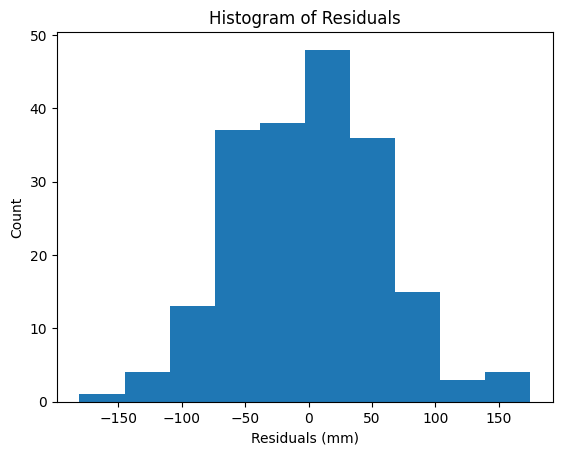

In [83]:
# Residuals
df["Residuals"] = df["Ht_Wife_Predicted"] - df["Ht_Wife"]

# Histogram (is it normally distributed)
fig, ax3 = plt.subplots()
ax3.hist(df["Residuals"])
ax3.set_xlabel("Residuals (mm)")
ax3.set_ylabel("Count")
ax3.set_title("Histogram of Residuals")
plt.show()


In [84]:
# Is it Gaussian enough?
df["Residuals"].describe()

count    1.990000e+02
mean     1.478500e-12
std      5.814130e+01
min     -1.807182e+02
25%     -4.225603e+01
50%      1.669811e+00
75%      4.059275e+01
max      1.749080e+02
Name: Residuals, dtype: float64

The are Gaussian enough:
- Residuals seem to be distributed normally. 
- The prediction error ranges from -180mm, to 175mm. 
- Residuals' mean and median are close to zero. 
- Taken together, our model seems to be valid, and suffers by a very little bias.

In [97]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ht_Wife   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     30.17
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.21e-07
Time:                        21:13:53   Log-Likelihood:                -1090.4
No. Observations:                 199   AIC:                             2185.
Df Residuals:                     197   BIC:                             2191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1028.5718    104.469      9.846      0.000     822.551    1234.592
df.Ht_Husband     0.3310      0.060      5.493      0.000       0.212       0.450
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.290
Skew:                          -0.084   Prob(JB):                        0.865
Kurtosis:                       3.081   Cond. No.                     4.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The obtaned regression slope is positive (0.33), and the associated p-value is close to zero. This indicates very significant positive association between the height of the husband and his wife.

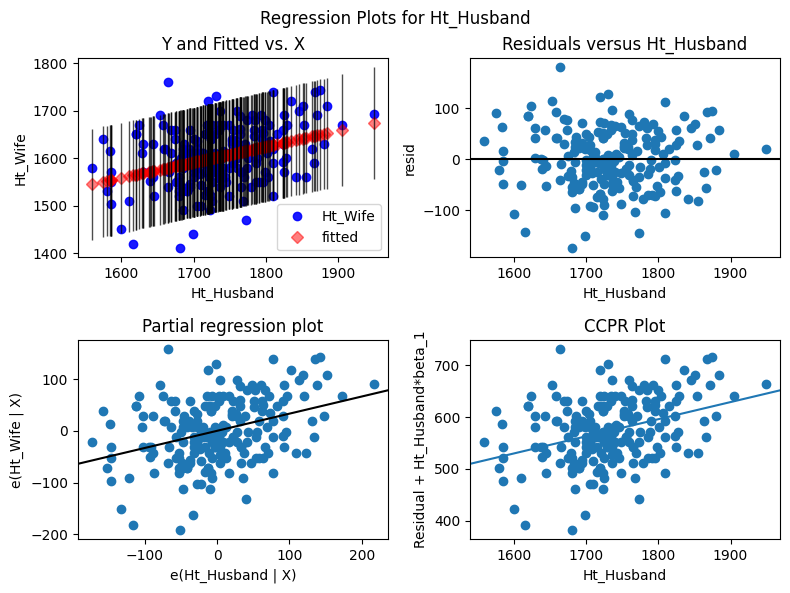

In [118]:
# A more practical evaluation
fig = plt.figure(figsize=(8,6))
fig = plot_regress_exog(results,'Ht_Husband',fig=fig)

  - Top left figure shows actual values of wives' height along those estimated by the model.
  - Top right figure shows residuals plot, i.e. dependence of the residuals on the value of husbands' height.     
  - Bottom left figure shows partial regression plot (for more details see https://en.wikipedia.org/wiki/Partial_regression_plot). 
  - Bottom right figure shows component and component-plus-residual (https://en.wikipedia.org/wiki/Partial_residual_plot)
  
Note, the last two plots mention are identical to the residuals plot. However these plots are very useful in case of the multiple regression (regression with multiple predictors) and are important part of the visual inspection.

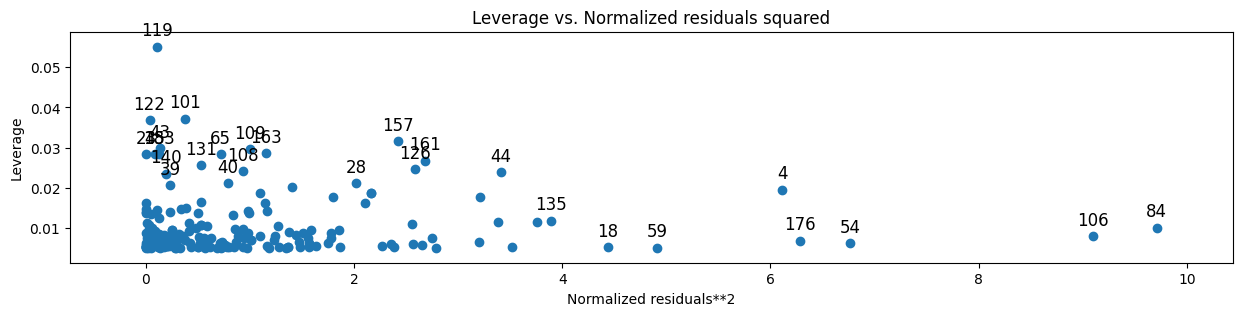

In [107]:
# Individual residual leverage
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(results, ax=ax)

As we can see, generally the greater the residual lower the leverage. To get a better picture we can plot the influence of the individual observations:

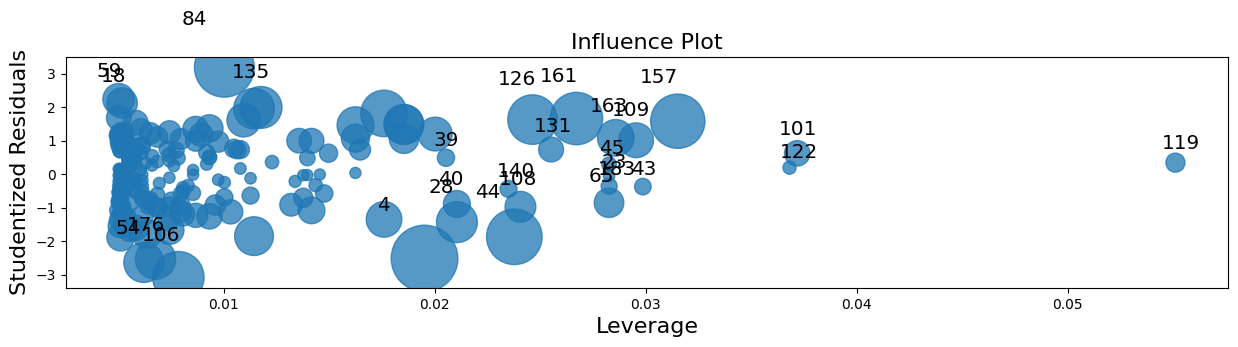

In [109]:
# Influence plot
fig, ax = plt.subplots(figsize=(15,3))
fig = influence_plot(results, ax=ax)

This plot highlights how influential individual observations are, i.e. highlight the observation with great residuals yet with great leverage. Visual inspection is sucessfully done.

In [122]:
# R-squared
# Let's calculate the correlation between the estimate and true values of the wives' heights
cm = df[['Ht_Wife', 'Ht_Wife_Predicted']].corr()

# Square the obtained values
R2 = cm.loc['Ht_Wife', 'Ht_Wife_Predicted']**2

# Print the R-squared
print ('R2 = %f' % R2)


R2 = 0.132812


- As indicated by the obtained $R^2$, height of the husband can explain only approximately 13% of the total variance of the wive's heights. 
- This is a very small fraction, and it means that husband's heigh is not sufficient to accurately predict height of his wife.

In [126]:
# RMSE
ht_rmse = rmse(df.Ht_Wife_Predicted, df.Ht_Wife)

# Print RMSE
print('RMSE = %f' % ht_rmse)

# Normalize by the mean wive's height
ht_nrmse = ht_rmse / df.Ht_Wife.mean()

# Print NRMSE
print('NRMSE = %f' % ht_nrmse)

RMSE = 57.995033
NRMSE = 0.036203


The obtained RMSE is approximately 58mm, which means that in average our predictions are off by 58mm, which is approximately 3.6% of the average height of the wives in our dataset.

In [163]:
# Predict the height of wife when husband is 69 inchess tall
Ht_Predicted_69inches = (69*slope) + (intercept/25.4)
print("When husband's height is 69 inches, wife's height is {h} inches.".format(h=round(Ht_Predicted_69inches,0)))

When husband's height is 69 inches, wife's height is 63.0 inches.


# 3. Outliers

You meet a married man is 6'7" (79 inches). Would it be wise to use the same linear model to predict his wife's height? Why or why not?

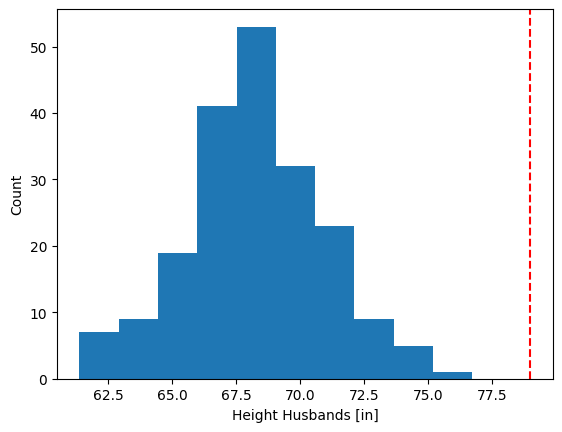

In [166]:
# Histogram of training data
hst = plt.hist(df.Ht_Husband_in)

# Height of the man in question
plt.axvline(x = 79, linestyle = '--', color='red')

# Add axes labels
plt.xlabel('Height Husbands [in]')
plt.ylabel('Count')

# Plot
plt.show()

It appears that:
- The height of the man in question is way above the range of values the regression model was trained on. 
- This can be shown by the comparison of his height with the distribution of the values model was trained on.
- Intuitively we can expect the prediction for such the value out of the original range (i.e. extrapolation) can be very inaccurate. 

# 4. Examine the age relationships

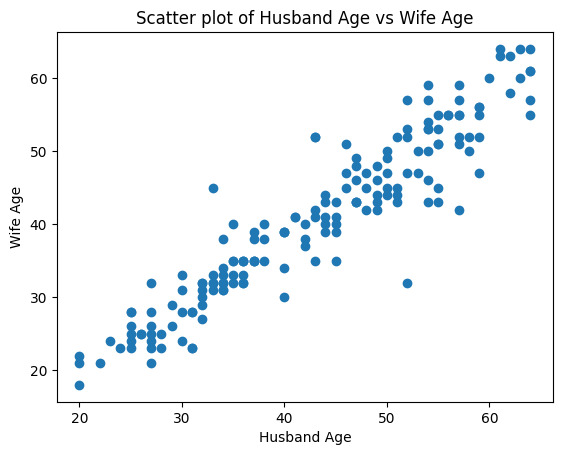

In [172]:
# Scatter plot
fig, ax4 = plt.subplots()
ax4.plot(df.Age_Husband,df.Age_Wife,'o')
ax4.set_xlabel("Husband Age")
ax4.set_ylabel("Wife Age")
ax4.set_title("Scatter plot of Husband Age vs Wife Age")
plt.show()

In [184]:
# Correlation
df[["Age_Husband","Age_Wife"]].corr(method="pearson")

,Age_Husband,Age_Wife
Age_Husband,1.00000,0.93856
Age_Wife,0.93856,1.00000


Strong positive linear relationship with 93.856% association, which is stronger than that between their heights

In [185]:
# Get correlation
df["age_difference"]=df["Age_Husband"]-df["Age_Wife"]

# husband is 3 years older than wife
corr_3years_older = df[df["age_difference"]>3][["Age_Husband","Age_Wife"]].corr(method="pearson")

# Wife is 2 years older than wife
corr_2years_older = df[df["age_difference"]<-2][["Age_Husband","Age_Wife"]].corr(method="pearson")

# Wife is half as old
corr_half_older = df[df["age_difference"]>df["age_difference"]/2][["Age_Husband","Age_Wife"]].corr(method="pearson")

In [186]:
# OLS
m2 = smf.ols("Age_Wife~Age_Husband",data=df)
results2 = m2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               Age_Wife   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1243.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.56e-79
Time:                        22:43:10   Log-Likelihood:                -473.79
No. Observations:                 170   AIC:                             951.6
Df Residuals:                     168   BIC:                             957.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5740      1.150      1.369      

Linear regression equation is $\hat{y} = 0.9112x_i + 1.5740$

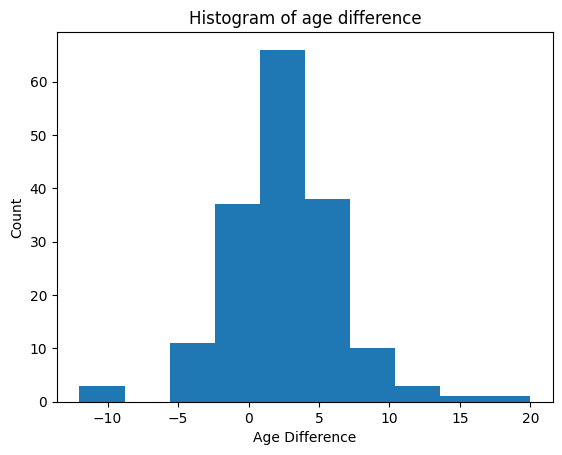

In [191]:
# Is the age difference consistent?
fig, ax5 = plt.subplots()
ax5.hist(df["age_difference"])
ax5.set_xlabel("Age Difference")
ax5.set_ylabel("Count")
ax5.set_title("Histogram of age difference")
plt.show()

The histogram shows a normal distribution of age differnece, that means the age difference between husbands and wives is not consistent across ages.

End
***